In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/TESIS_PYTHON/ALIMENTACION/Alimentacion.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df.sample(14)

Visualizacion de datos


No Saludable    195
Saludable       128
Name: Diagnostico, dtype: int64


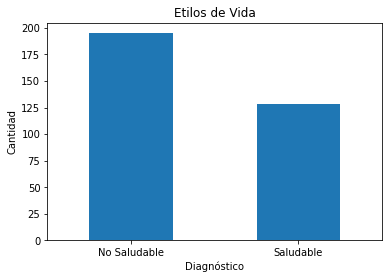

In [ ]:
#Exploración de datos: Cantidad de la clase de la variable de salida
clases=pd.value_counts(df['Diagnostico'], sort=True)
print(clases)
clases.plot(kind='bar', rot=0)
plt.title('Etilos de Vida')
plt.ylabel('Cantidad')
plt.xlabel('Diagnóstico')
LABELS=np.array(['No Saludable','Saludable'])
plt.xticks(range(2),LABELS)
plt.show()

**Procesamiento de Datos**

In [ ]:
#Verificación de datos faltantes
contador=df.isnull().sum()
contador

edad              0
sexo              0
e_profesional     0
c_academico       0
trabaja           0
e_civil           0
v_frutas          0
r_grasas          0
l_etiquetas       0
b_alcoholicas     0
agua              0
comer_deshoras    0
c_dulces          0
peso              0
Diagnostico       0
dtype: int64

In [ ]:
#Eliminación de columnas no relevantes
df.drop(['edad','sexo','e_profesional','c_academico','trabaja','e_civil'], axis = 1, inplace=True)

In [ ]:
df.columns

Index(['v_frutas', 'r_grasas', 'l_etiquetas', 'b_alcoholicas', 'agua',
       'comer_deshoras', 'c_dulces', 'peso', 'Diagnostico'],
      dtype='object')

In [ ]:
#Valores únicos de una de las características: v_frutas
pd.unique(df['v_frutas'])

array(['3 porciones de verduras y 2 frutas',
       '5 porciones de verduras y 4 frutas',
       '4 porciones de verduras y 3 frutas'], dtype=object)

In [ ]:
#Alimentación: Reemplazando con valores ordinales
df['v_frutas'].replace(('5 porciones de verduras y 4 frutas','4 porciones de verduras y 3 frutas','3 porciones de verduras y 2 frutas'),(2,1,0), inplace = True)
df['r_grasas'].replace(('Nada','Poco', 'Mucho', 'Demasiado'),(0,1,2,3), inplace = True)
df['l_etiquetas'].replace(('Nunca','Casi nunca','A veces', 'Frecuentemente', 'Siempre'),(0,1,2,3,4), inplace = True)
df['b_alcoholicas'].replace(('Nunca', 'Una vez al año', 'Menos de 12 veces al año', 'Una vez al mes', 'Cada fin de semana'),(4,3,2,1,0), inplace = True)
df['agua'].replace(('Menos de 6 vasos', 'Entre 6 a 8 vasos', 'Más de 8 vasos'),(0,1,2), inplace = True)
df['comer_deshoras'].replace(('Presentación de proyectos Finales', 'Exámenes Parciales','Tengo que trabajar y estudiar', 'Vivo lejos a la universidad','Falta de apoyo económico'),(0,1,2,3,4), inplace = True)
df['c_dulces'].replace(('Más de 7 dulces','4 a 7 dulces','Menos de 3 dulces','0 dulces'),(0,1,2,3), inplace = True)
df['peso'].replace(('Obesidad','Sobrepeso', 'Peso normal', 'Debajo de su peso normal'),(0,1,2,3), inplace = True)
#Target: Reemplazando con valores binarios
df['Diagnostico'].replace(('No Saludable', 'Saludable'),(0,1),inplace = True)

In [ ]:
#Visualización de tipo de datos, todos debe ser numéricos
df.dtypes

v_frutas          int64
r_grasas          int64
l_etiquetas       int64
b_alcoholicas     int64
agua              int64
comer_deshoras    int64
c_dulces          int64
peso              int64
Diagnostico       int64
dtype: object

In [ ]:
df.head()

,v_frutas,r_grasas,l_etiquetas,b_alcoholicas,agua,comer_deshoras,c_dulces,peso,Diagnostico
0,0,3,4,2,0,0,2,2,0
1,0,1,2,2,0,0,0,1,0
2,0,3,3,4,0,2,0,0,0
3,2,0,3,3,1,1,3,2,1
4,0,3,1,0,0,2,3,2,0


In [ ]:
#Separación de atributos y la variable de salida
from sklearn.model_selection import train_test_split
x=df.drop(['Diagnostico'],axis=1)
y=df[['Diagnostico']]

In [ ]:
#Separación de datos para etapas de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=5)
len(x_train)

258

In [ ]:
#Cantidad de la clase del target antes del Sobremuestreo
before_train=pd.value_counts(y_train['Diagnostico'], sort=True)
before_train

0    158
1    100
Name: Diagnostico, dtype: int64

In [ ]:
pd.value_counts(df['Diagnostico'], sort= True)

0    195
1    128
Name: Diagnostico, dtype: int64

**Balanceo de Datos: Met. Sobremuestreo**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
x_train_os, y_train_os = os.fit_resample(x_train, y_train)
balanceado=pd.value_counts(y_train_os['Diagnostico'], sort=True)
print(balanceado)

1    158
0    158
Name: Diagnostico, dtype: int64


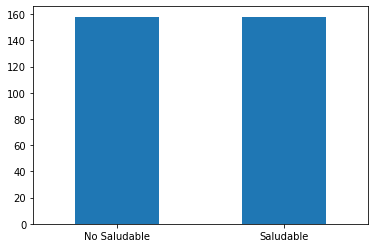

In [ ]:
#Se juntó en un dataframe los resultados
df_balanceado = pd.DataFrame(data=x_train_os, columns=df.drop(['Diagnostico'], axis=1).columns)
df_balanceado['Diagnostico']=y_train_os
clases=pd.value_counts(df_balanceado['Diagnostico'], sort=True)
clases.plot(kind="bar", rot=0)
LABELS=np.array(['No Saludable','Saludable'])
plt.xticks(range(2), LABELS) 
plt.show()

**Selección de Características: Filtros de correlación** 

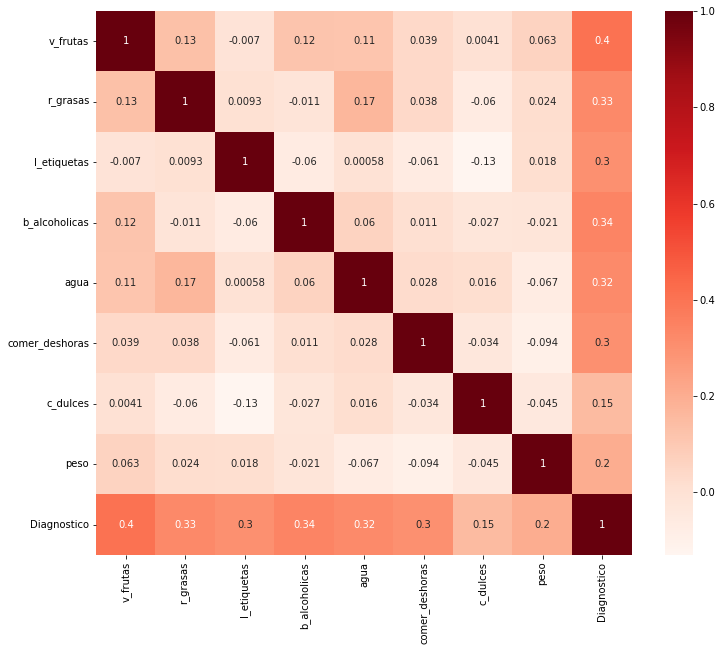

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=df_balanceado.corr()
sns.heatmap (cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [ ]:
#Almacenando los valores de correlación con respecto a
#la variable de salida Diagnóstico
correlacion=abs(cor["Diagnostico"])
correlacion


v_frutas          0.404269
r_grasas          0.326332
l_etiquetas       0.298694
b_alcoholicas     0.344662
agua              0.323856
comer_deshoras    0.299019
c_dulces          0.153877
peso              0.202072
Diagnostico       1.000000
Name: Diagnostico, dtype: float64

In [ ]:
#Realización de filtro de los atributos que posean un grado de
#correlación mayor a 0.3
car_relevantes = correlacion[correlacion>0.3]
car_relevantes

v_frutas         0.404269
r_grasas         0.326332
b_alcoholicas    0.344662
agua             0.323856
Diagnostico      1.000000
Name: Diagnostico, dtype: float64

In [ ]:
#Verificación de la correlación de las variables seleccionadas
df_balanceado[['v_frutas','r_grasas','l_etiquetas','b_alcoholicas','agua','comer_deshoras']].corr()

,v_frutas,r_grasas,l_etiquetas,b_alcoholicas,agua,comer_deshoras
v_frutas,1.000000,0.132874,-0.007001,0.120299,0.113664,0.038835
r_grasas,0.132874,1.000000,0.009324,-0.010976,0.166405,0.038473
l_etiquetas,-0.007001,0.009324,1.000000,-0.060144,0.000578,-0.060933
b_alcoholicas,0.120299,-0.010976,-0.060144,1.000000,0.060377,0.011221
agua,0.113664,0.166405,0.000578,0.060377,1.000000,0.028065
comer_deshoras,0.038835,0.038473,-0.060933,0.011221,0.028065,1.000000


In [ ]:
df_seleccion = df_balanceado[['v_frutas','r_grasas','l_etiquetas','b_alcoholicas','agua','comer_deshoras','Diagnostico']]
df_seleccion.to_csv('/content/drive/MyDrive/TESIS_PYTHON/ALIMENTACION/balanced_food_selection.csv', index=False)

In [ ]:
#Exportación del dataset de prueba
df_prueba = pd.DataFrame(data=x_test, columns=df.drop(['Diagnostico'], axis=1).columns)
df_prueba['Diagnostico']=y_test
df_prueba.to_csv('/content/drive/MyDrive/TESIS_PYTHON/ALIMENTACION/food_test.csv', index= False)

  CROSS VALIDATION

In [ ]:
x = df_seleccion.drop(['Diagnostico'], axis=1)
y = df_seleccion['Diagnostico']

In [ ]:
from sklearn.svm import SVC
SVC = SVC(gamma='auto', C=2.0, kernel='linear')
from sklearn.model_selection import cross_val_score

SVC.fit(x,y)
print(SVC.score(x,y))
print(cross_val_score(SVC, x,y, cv=5).mean())

0.8734177215189873
0.8672619047619048


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

print(knn.score(x,y))
print(cross_val_score(knn, x,y, cv=5).mean())

0.9177215189873418
0.7976190476190477


In [ ]:
from sklearn import tree
tr = tree.DecisionTreeClassifier(max_depth=10)
tr.fit(x,y)

print(tr.score(x,y))
print(cross_val_score(tr, x,y, cv=5).mean())

0.990506329113924
0.851388888888889
